In [3]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from scipy import stats
from scipy.stats import linregress

# Get the current working directory
current_directory = os.getcwd()

# Data file path relative to the current directory
file_name = "El_Paso_data.csv"
file_path = os.path.join(current_directory, file_name)

# Read El Paso data
El_Paso_total_df = pd.read_csv(file_path)

# Display the DataFrame
El_Paso_total_df

,Year,County,City,Population,Total Offenses
0,2013,El Paso County,El Paso,838966,21096
1,2013,Hudspeth,El Paso,3305,26
2,2014,El Paso County,El Paso,839969,19713
3,2014,Hudspeth,El Paso,3304,23
4,2015,El Paso County,El Paso,841774,18315
5,2015,Hudspeth,El Paso,3158,27
6,2016,El Paso County,El Paso,838465,17420
7,2016,Hudspeth,El Paso,3354,16
8,2017,El Paso County,El Paso,842905,17275
9,2017,Hudspeth,El Paso,4166,3


In [4]:
Hudspeth_df = El_Paso_total_df[El_Paso_total_df['County'] == 'Hudspeth']
Hudspeth_df['Crime Rate per 1,000'] = round((Hudspeth_df['Total Offenses'] / Hudspeth_df['Population'] * 1000),2)
El_Paso_County_df = El_Paso_total_df[El_Paso_total_df['County'] == 'El Paso County'].copy()
El_Paso_County_df['Crime Rate per 100,000'] = round((El_Paso_County_df['Total Offenses'] / El_Paso_County_df['Population'] * 100000), 2)
both_counties = pd.concat([Hudspeth_df, El_Paso_County_df], axis=1)

# Set 'Year' as the index for both DataFrames
Hudspeth_df.set_index('Year', inplace=True)
El_Paso_County_df.set_index('Year', inplace=True)

# Concatenate DataFrames side by side, aligning them by index (Year)
both_counties = pd.concat([Hudspeth_df, El_Paso_County_df], axis=1)

# Drop any rows that have NaN values, which occur if one DataFrame lacks data for that year
cleaned_counties = both_counties.dropna()

# Reset the index if you want 'Year' back as a column
cleaned_counties .reset_index(inplace=True)

# Show the cleaned DataFrame
cleaned_counties

C:\Users\Thomas\AppData\Local\Temp\ipykernel_21436\3054584159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hudspeth_df['Crime Rate per 1,000'] = round((Hudspeth_df['Total Offenses'] / Hudspeth_df['Population'] * 1000),2)


,Year,County,City,Population,Total Offenses,"Crime Rate per 1,000",County,City,Population,Total Offenses,"Crime Rate per 100,000"
0,2013,Hudspeth,El Paso,3305,26,7.87,El Paso County,El Paso,838966,21096,2514.52
1,2014,Hudspeth,El Paso,3304,23,6.96,El Paso County,El Paso,839969,19713,2346.87
2,2015,Hudspeth,El Paso,3158,27,8.55,El Paso County,El Paso,841774,18315,2175.76
3,2016,Hudspeth,El Paso,3354,16,4.77,El Paso County,El Paso,838465,17420,2077.61
4,2017,Hudspeth,El Paso,4166,3,0.72,El Paso County,El Paso,842905,17275,2049.46
5,2018,Hudspeth,El Paso,4558,35,7.68,El Paso County,El Paso,843458,14857,1761.44
6,2019,Hudspeth,El Paso,4972,22,4.42,El Paso County,El Paso,840222,14693,1748.70
7,2020,Hudspeth,El Paso,5068,17,3.35,El Paso County,El Paso,840442,12272,1460.18
8,2021,Hudspeth,El Paso,5037,16,3.18,El Paso County,El Paso,836739,11906,1422.90
9,2022,Hudspeth,El Paso,3401,2,0.59,El Paso County,El Paso,875027,13708,1566.58


In [5]:
El_Paso_total_df["Crime Rate per 100,000"]=round((El_Paso_total_df["Total Offenses"]/El_Paso_total_df["Population"]*100000),2)
El_Paso_total_df

,Year,County,City,Population,Total Offenses,"Crime Rate per 100,000"
0,2013,El Paso County,El Paso,838966,21096,2514.52
1,2013,Hudspeth,El Paso,3305,26,786.69
2,2014,El Paso County,El Paso,839969,19713,2346.87
3,2014,Hudspeth,El Paso,3304,23,696.13
4,2015,El Paso County,El Paso,841774,18315,2175.76
5,2015,Hudspeth,El Paso,3158,27,854.97
6,2016,El Paso County,El Paso,838465,17420,2077.61
7,2016,Hudspeth,El Paso,3354,16,477.04
8,2017,El Paso County,El Paso,842905,17275,2049.46
9,2017,Hudspeth,El Paso,4166,3,72.01


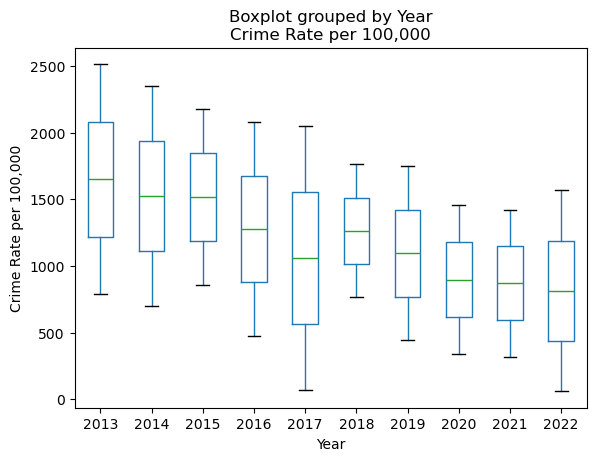

In [7]:
El_Paso_total_df.boxplot(by="Year", column="Crime Rate per 100,000", showfliers=True, grid=False)

plt.ylabel("Crime Rate per 100,000")

plt.show()

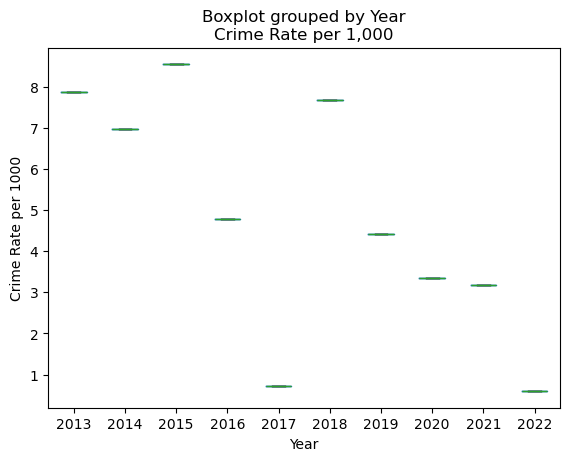

In [8]:
Hudspeth_df.boxplot(by="Year", column="Crime Rate per 1,000", showfliers=True, grid=False)

plt.ylabel("Crime Rate per 1000")

plt.show()

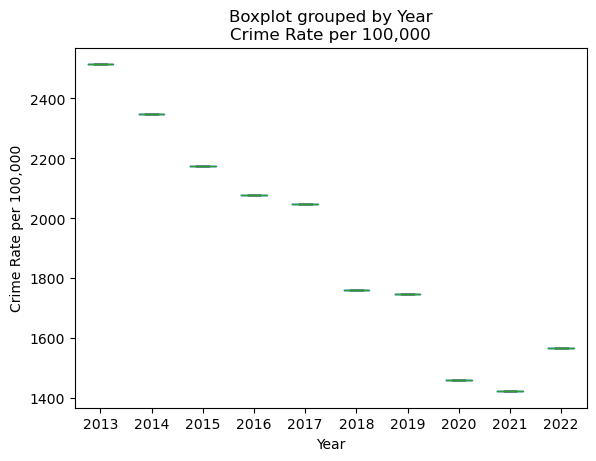

In [9]:
El_Paso_County_df.boxplot(by="Year", column="Crime Rate per 100,000", showfliers=True, grid=False)

plt.ylabel("Crime Rate per 100,000")

plt.show()

In [10]:
El_Paso_City_df = El_Paso_total_df.groupby(['Year', 'City']).agg({
    'Population': 'sum',
    'Total Offenses': 'sum', 
}).reset_index()

# Display the grouped dataframe
El_Paso_City_df

,Year,City,Population,Total Offenses
0,2013,El Paso,842271,21122
1,2014,El Paso,843273,19736
2,2015,El Paso,844932,18342
3,2016,El Paso,841819,17436
4,2017,El Paso,847071,17278
5,2018,El Paso,848016,14892
6,2019,El Paso,845194,14715
7,2020,El Paso,845510,12289
8,2021,El Paso,841776,11922
9,2022,El Paso,878428,13710


In [11]:
El_Paso_City_df['Crime Rate per 100,000'] = round((El_Paso_City_df['Total Offenses'] / El_Paso_City_df['Population'] * 100000),2)
El_Paso_City_df["Population Change %"] = round(El_Paso_City_df["Population"].pct_change() * 100,2)
El_Paso_City_df["Total Offenses Change %"] = round(El_Paso_City_df["Total Offenses"].pct_change() * 100,2)
El_Paso_City_df["Crime Rate Change %"] = round(El_Paso_City_df["Crime Rate per 100,000"].pct_change() * 100,2)
El_Paso_City_df

,Year,City,Population,Total Offenses,"Crime Rate per 100,000",Population Change %,Total Offenses Change %,Crime Rate Change %
0,2013,El Paso,842271,21122,2507.74,NaN,NaN,NaN
1,2014,El Paso,843273,19736,2340.40,0.12,-6.56,-6.67
2,2015,El Paso,844932,18342,2170.83,0.20,-7.06,-7.25
3,2016,El Paso,841819,17436,2071.23,-0.37,-4.94,-4.59
4,2017,El Paso,847071,17278,2039.73,0.62,-0.91,-1.52
5,2018,El Paso,848016,14892,1756.10,0.11,-13.81,-13.91
6,2019,El Paso,845194,14715,1741.02,-0.33,-1.19,-0.86
7,2020,El Paso,845510,12289,1453.44,0.04,-16.49,-16.52
8,2021,El Paso,841776,11922,1416.29,-0.44,-2.99,-2.56
9,2022,El Paso,878428,13710,1560.74,4.35,15.00,10.20


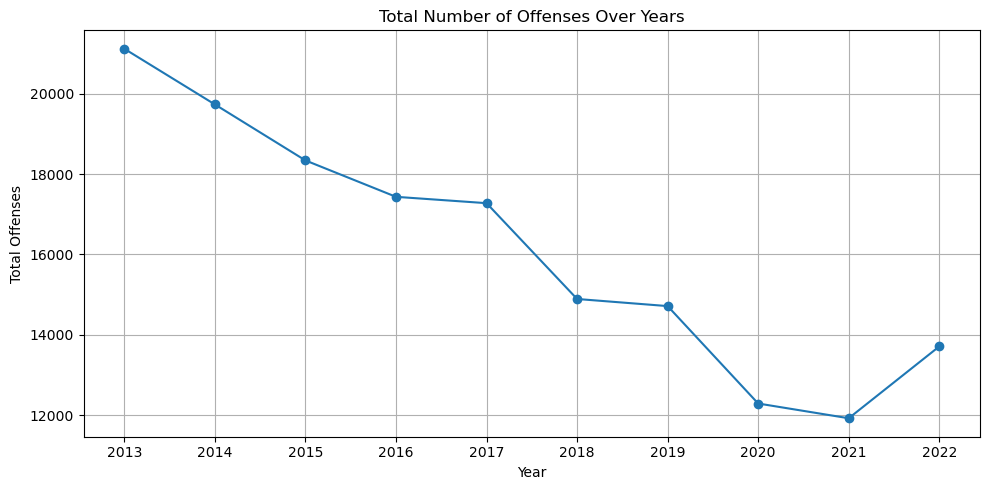

In [31]:
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(El_Paso_City_df['Year'], El_Paso_City_df['Total Offenses'], marker='o')  # Line chart
plt.title('Total Number of Offenses Over Years')  # Title of the plot
plt.xlabel('Year')  # Label for x-axis
plt.ylabel('Total Offenses')  # Label for y-axis
plt.grid(True)  # Optional: adds a grid
plt.xticks(El_Paso_City_df['Year'])  # Set x-axis ticks to be exact years in the DataFrame
plt.tight_layout()  # Optional: adjusts subplots to give some padding
plt.show()

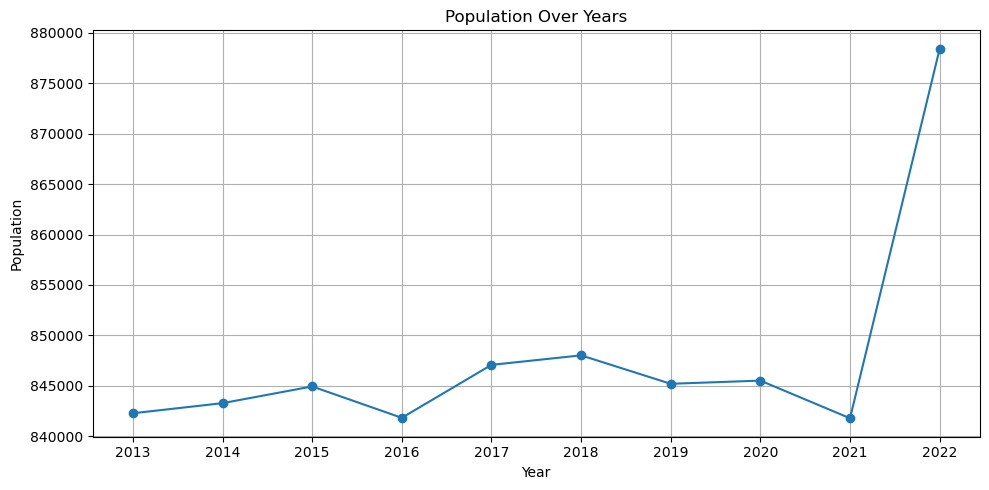

In [34]:
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(El_Paso_City_df['Year'], El_Paso_City_df['Population'], marker='o')  # Line chart
plt.title('Population Over Years')  # Title of the plot
plt.xlabel('Year')  # Label for x-axis
plt.ylabel('Population')  # Label for y-axis
plt.grid(True)  # Optional: adds a grid
plt.xticks(El_Paso_City_df['Year'])  # Set x-axis ticks to be exact years in the DataFrame
plt.tight_layout()  # Optional: adjusts subplots to give some padding
plt.show()

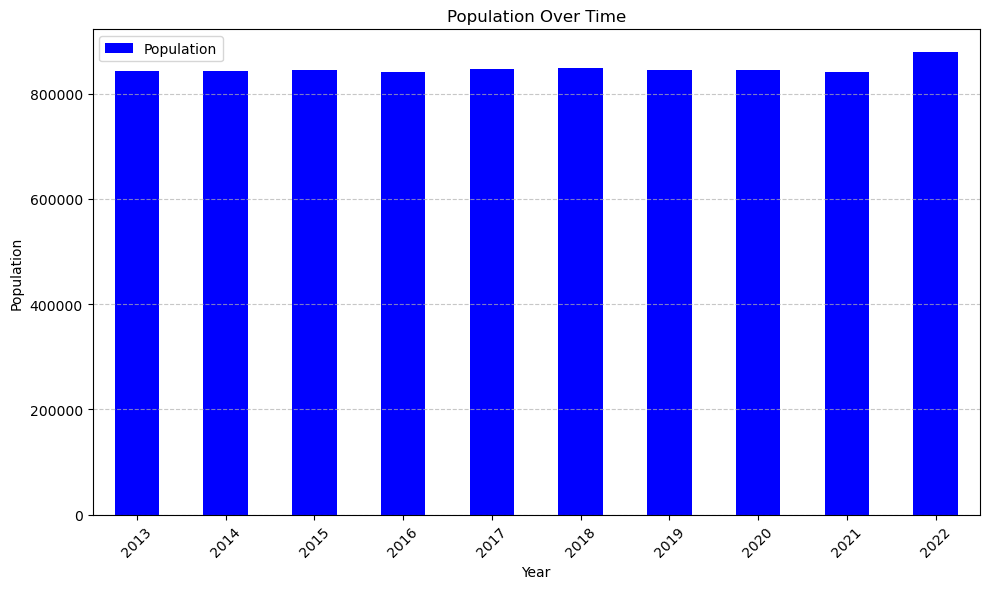

In [12]:
# Group the data by year and calculate the total population for each year
population_by_year = El_Paso_City_df.groupby('Year')['Population'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
population_by_year.plot(kind='bar', color='blue')
plt.title('Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

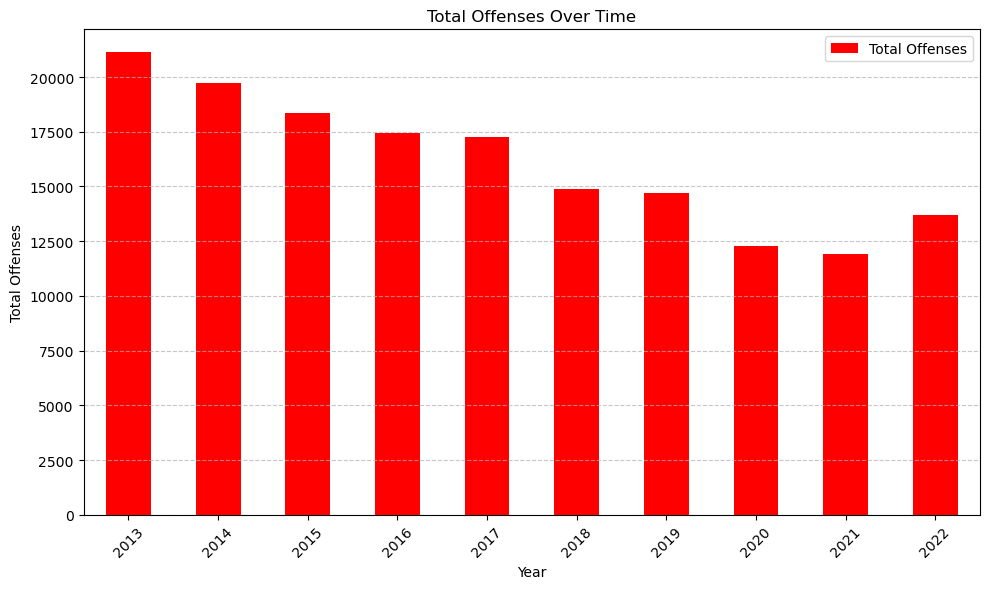

In [13]:
crime_by_year = El_Paso_City_df.groupby('Year')['Total Offenses'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='bar', color='red' )
plt.title('Total Offenses Over Time')
plt.xlabel('Year')
plt.ylabel('Total Offenses')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

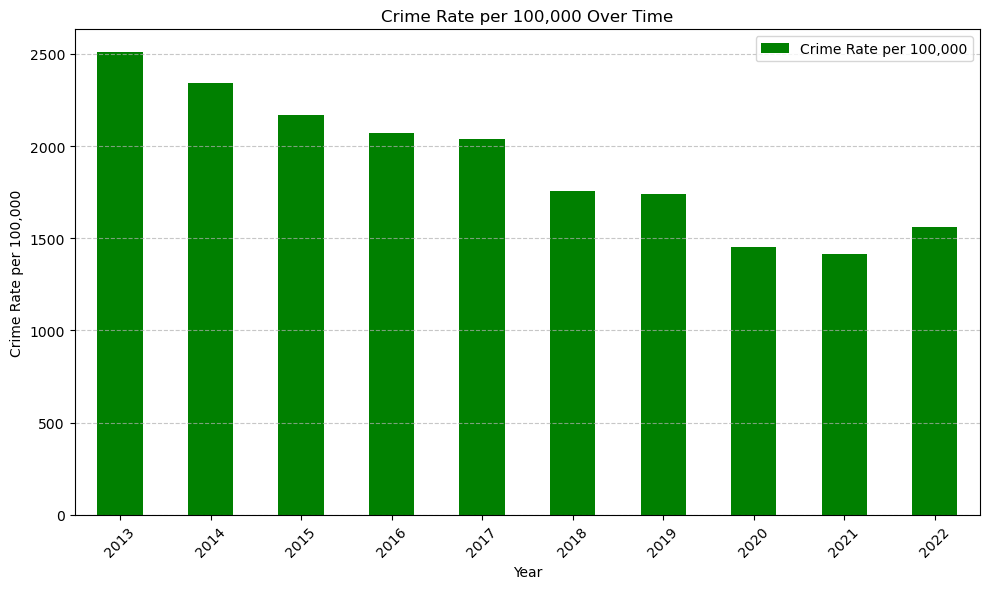

In [14]:
crime_per_100000_by_year = El_Paso_City_df.groupby('Year')['Crime Rate per 100,000'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
crime_per_100000_by_year.plot(kind='bar', color='green')
plt.title('Crime Rate per 100,000 Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Rate per 100,000')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

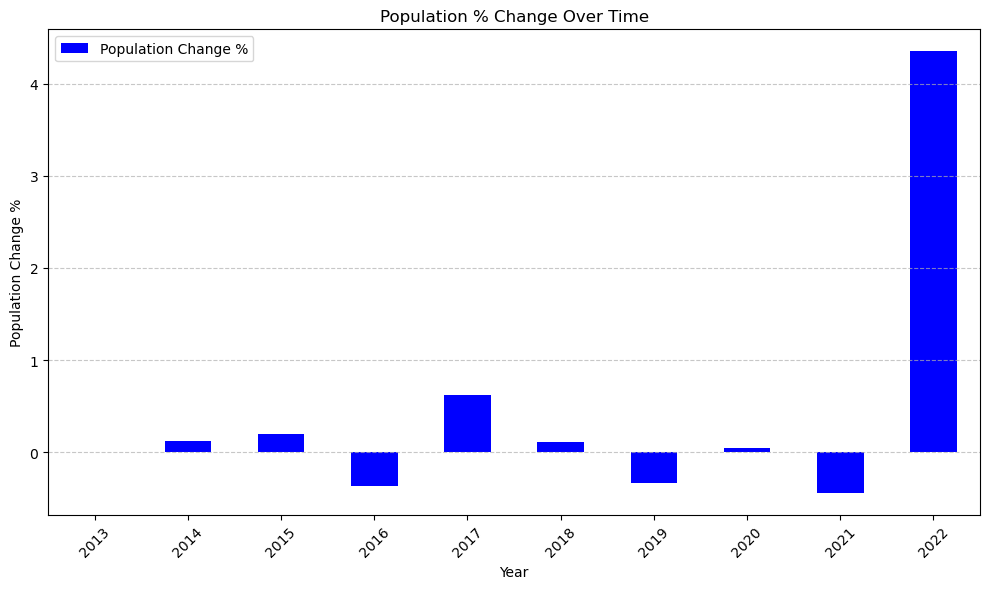

In [15]:
# Group the data by year and calculate the total population for each year
population_change = El_Paso_City_df.groupby('Year')['Population Change %'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
population_change.plot(kind='bar', color='blue')
plt.title('Population % Change Over Time')
plt.xlabel('Year')
plt.ylabel('Population Change %')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

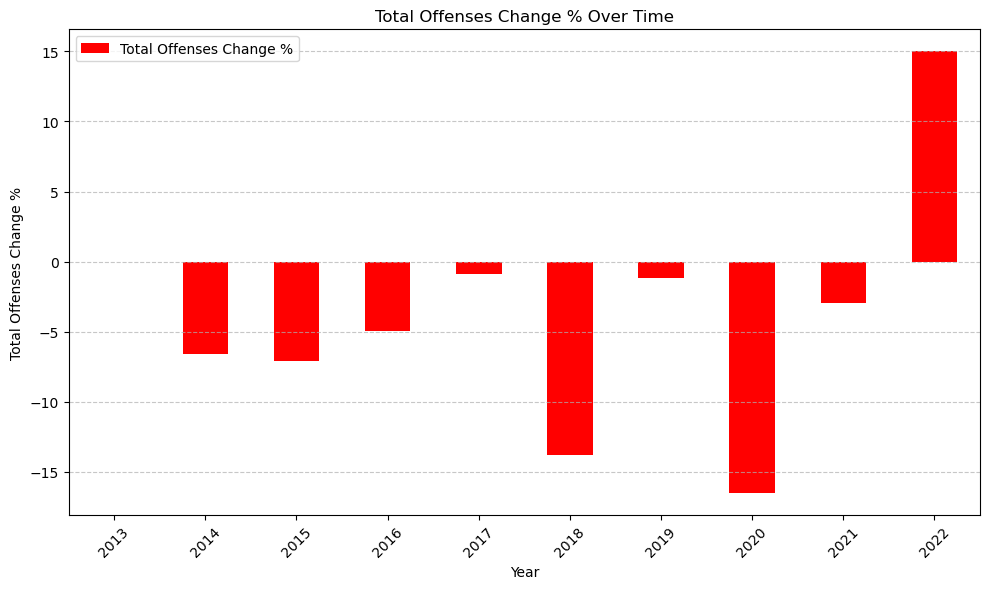

In [16]:
# Group the data by year and calculate the total population for each year
total_offenses_change = El_Paso_City_df.groupby('Year')['Total Offenses Change %'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
total_offenses_change.plot(kind='bar', color='red')
plt.title('Total Offenses Change % Over Time')
plt.xlabel('Year')
plt.ylabel('Total Offenses Change %')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

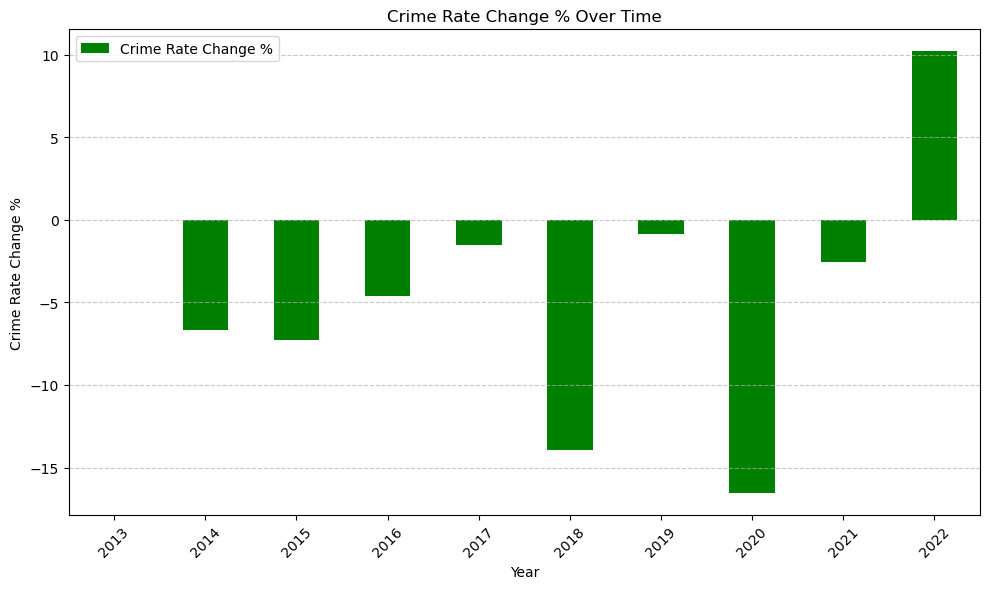

In [17]:
# Group the data by year and calculate the total population for each year
crime_rate_change = El_Paso_City_df.groupby('Year')['Crime Rate Change %'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
crime_rate_change.plot(kind='bar', color='green')
plt.title('Crime Rate Change % Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Rate Change %')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

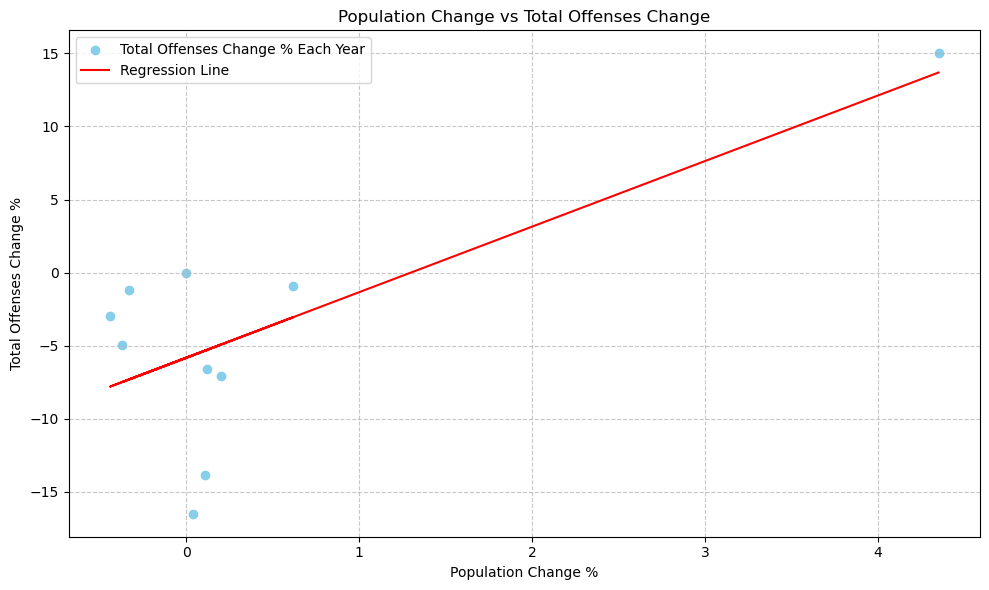

In [18]:
# Group the data by year and calculate the total population and total offenses for each year
data = El_Paso_City_df.groupby('Year').agg({'Population Change %': 'sum', 'Total Offenses Change %': 'sum'}).reset_index()

# Extracting population and total offenses data
population = data['Population Change %']
total_offenses = data['Total Offenses Change %']

# Perform linear regression
coefficients = np.polyfit(population, total_offenses, 1)
polynomial = np.poly1d(coefficients)

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(population, total_offenses, color='skyblue', label='Total Offenses Change % Each Year')

# Plotting the regression line
plt.plot(population, polynomial(population), color='red', linestyle='-', label='Regression Line')

plt.title('Population Change vs Total Offenses Change')
plt.xlabel('Population Change %')
plt.ylabel('Total Offenses Change %')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
data = El_Paso_City_df.groupby('Year').agg({'Population Change %': 'sum', 'Total Offenses Change %': 'sum'}).reset_index()

# Extracting population and total offenses data
population = data['Population Change %']
total_offenses = data['Total Offenses Change %']

# Calculate the correlation coefficient (r-value)
correlation_matrix = np.corrcoef(population, total_offenses)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation Coefficient (r-value):", correlation_coefficient)

Correlation Coefficient (r-value): 0.7376736924825067


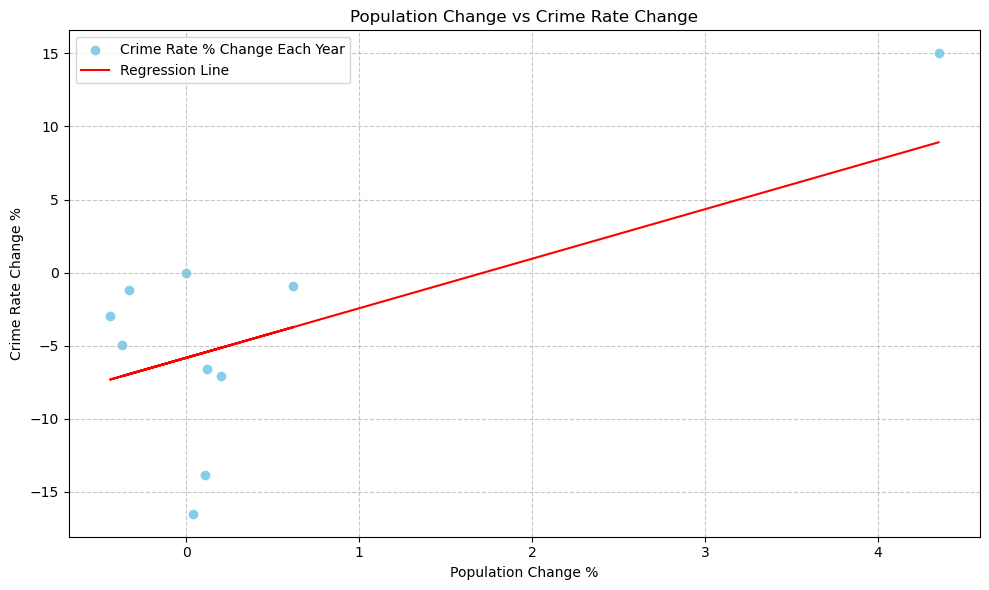

In [20]:
# Group the data by year and calculate the total population and total offenses for each year
data = El_Paso_City_df.groupby('Year').agg({'Population Change %': 'sum', 'Crime Rate Change %': 'sum'}).reset_index()

# Extracting population and total offenses data
population = data['Population Change %']
crime_rate = data['Crime Rate Change %']

# Perform linear regression
coefficients = np.polyfit(population, crime_rate, 1)
polynomial = np.poly1d(coefficients)

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(population, total_offenses, color='skyblue', label='Crime Rate % Change Each Year')

# Plotting the regression line
plt.plot(population, polynomial(population), color='red', linestyle='-', label='Regression Line')

plt.title('Population Change vs Crime Rate Change')
plt.xlabel('Population Change %')
plt.ylabel('Crime Rate Change %')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
data = El_Paso_City_df.groupby('Year').agg({'Population Change %': 'sum', 'Crime Rate Change %': 'sum'}).reset_index()

# Extracting population and total offenses data
population = data['Population Change %']
crime_rate = data['Crime Rate Change %']

# Calculate the correlation coefficient (r-value)
correlation_matrix = np.corrcoef(population, crime_rate)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation Coefficient (r-value):", correlation_coefficient)

Correlation Coefficient (r-value): 0.6376391309642503


In [22]:
Covid_Years = [2020,2021]
Crime_Rate_Covid = El_Paso_City_df[El_Paso_City_df["Year"].isin(Covid_Years)]
Mean_Crime_Rate_Covid = Crime_Rate_Covid["Crime Rate per 100,000"].mean()
Mean_Crime_Rate_Covid

1434.865

In [23]:
Crime_Rate_Non_Covid = El_Paso_City_df[~El_Paso_City_df["Year"].isin(Covid_Years)]
Mean_Crime_Rate_Non_Covid = Crime_Rate_Non_Covid["Crime Rate per 100,000"].mean()
Mean_Crime_Rate_Non_Covid 

2023.4737499999999

In [24]:
t_test, p_value=stats.ttest_ind(Crime_Rate_Covid["Crime Rate per 100,000"],Crime_Rate_Non_Covid["Crime Rate per 100,000"], equal_var=False)
print("T-Statistic:", t_test)
print("P-Value:", p_value)

T-Statistic: -5.106875827951788
P-Value: 0.0012008577002542407


In [25]:
Election_Years = [2016,2020]
Crime_Rate_Election_Years = El_Paso_City_df[El_Paso_City_df["Year"].isin(Election_Years)]
Mean_Crime_Rate_Election_Years = Crime_Rate_Election_Years["Crime Rate per 100,000"].mean()
Mean_Crime_Rate_Election_Years

1762.335

In [26]:
Crime_Rate_Non_Election_Years = El_Paso_City_df[~El_Paso_City_df["Year"].isin(Election_Years)]
Mean_Crime_Rate_Non_Election_Years = Crime_Rate_Non_Election_Years["Crime Rate per 100,000"].mean()
Mean_Crime_Rate_Non_Election_Years 

1941.6062499999998

In [27]:
t_test, p_value=stats.ttest_ind(Crime_Rate_Election_Years["Crime Rate per 100,000"],Crime_Rate_Non_Election_Years["Crime Rate per 100,000"], equal_var=False)
print("T-Statistic:", t_test)
print("P-Value:", p_value)

T-Statistic: -0.5310936458144042
P-Value: 0.6665169477506511
